In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
'Colab Notebooks'      'Internship-Aug2020-Gowtham R.pdf'   Photos
'Getting started.pdf'  'My Drive'			   'Pongal 2021'


In [2]:
%cd /content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project

/content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project


In [39]:

import pandas as pd
import numpy as np 
from os.path import join
from myFunctions.candle_stick_plot import plotCandleStick
from myFunctions.list_data_dir import load_data_files
from myFunctions import dataConversion 
from myFunctions.predictionPlot import prediction_plot
from sklearn.model_selection import train_test_split
from keras.layers import Dense,LSTM
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasRegressor,KerasClassifier
from sklearn.model_selection import RandomizedSearchCV,KFold

In [30]:
fields = ['Date','High','Low','Open','Close']
lookback = 30
datafolder = r"/content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project/Data/NIFTY50"
prediction_date = pd.Timestamp(2020,11,30,00,00,00)

In [31]:
df = pd.read_csv(r"/content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project/Data/NIFTY50/ADANIPORTS.csv",usecols = fields)
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close
0,2007-11-27,770.00,1050.00,770.0,962.90
1,2007-11-28,984.00,990.00,874.0,893.90
2,2007-11-29,909.00,914.75,841.0,884.20
3,2007-11-30,890.00,958.00,890.0,921.55
4,2007-12-03,939.75,995.00,922.0,969.30


In [32]:
df.values

array([[Timestamp('2007-11-27 00:00:00'), 770.0, 1050.0, 770.0, 962.9],
       [Timestamp('2007-11-28 00:00:00'), 984.0, 990.0, 874.0, 893.9],
       [Timestamp('2007-11-29 00:00:00'), 909.0, 914.75, 841.0, 884.2],
       ...,
       [Timestamp('2020-11-25 00:00:00'), 396.3, 404.7, 384.4, 398.95],
       [Timestamp('2020-11-26 00:00:00'), 400.8, 413.0, 395.65, 410.15],
       [Timestamp('2020-11-27 00:00:00'), 411.0, 416.0, 408.2, 411.55]],
      dtype=object)

In [33]:
High_X , High_y = dataConversion.convert2matrix(df['High'],lookback)

In [34]:
High_X.shape

(3190, 30)

In [35]:
High_X = High_X.reshape(3190,30,1)

In [36]:
High_X_train, High_X_test , High_y_train , High_y_test = train_test_split(High_X,High_y,test_size=0.2)

In [37]:
High_X_test.shape

(638, 30, 1)

In [59]:
model = Sequential()
model.add(LSTM(50, activation='relu',return_sequences=True, input_shape=(lookback, 1)))
model.add(LSTM(25,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [62]:
history = model.fit(High_X_train, High_y_train, epochs=100, batch_size=30, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

Epoch 1/100
69/69 [==============================] - 4s 31ms/step - loss: 1535402.3839 - val_loss: 135830.0000
Epoch 2/100
69/69 [==============================] - 2s 27ms/step - loss: 85283.5931 - val_loss: 76073.3984
Epoch 3/100
69/69 [==============================] - 2s 28ms/step - loss: 48741.6265 - val_loss: 9415.3037
Epoch 4/100
69/69 [==============================] - 2s 27ms/step - loss: 64099.3612 - val_loss: 267288.4062
Epoch 5/100
69/69 [==============================] - 2s 28ms/step - loss: 140471.3932 - val_loss: 16409.1465
Epoch 6/100
69/69 [==============================] - 2s 28ms/step - loss: 126023.6888 - val_loss: 15674.5654
Epoch 7/100
69/69 [==============================] - 2s 28ms/step - loss: 22286.7486 - val_loss: 8799.0186
Epoch 8/100
69/69 [==============================] - 2s 27ms/step - loss: 36692.7447 - val_loss: 37996.7617
Epoch 9/100
69/69 [==============================] - 2s 27ms/step - loss: 71220.3227 - val_loss: 222421.5938
Epoch 10/100
69/69 [===

In [57]:
def model_loss(history):
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(loc='upper right')
    plt.show()

In [63]:
model.evaluate(High_X_test,High_y_test)

20/20 [==============================] - 0s 8ms/step - loss: 5676.1763


5676.17626953125

In [64]:
from sklearn.metrics import r2_score

In [65]:
y_predict = model.predict(High_X_test)

In [66]:
r2_score(High_y_test,y_predict)

0.8306569175696707

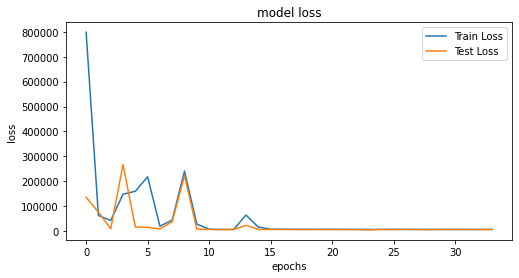

In [67]:
model_loss(history)

In [56]:
import matplotlib.pyplot as plt


In [69]:
def create_model(layers=1 ,neurons=50):
    model1=Sequential()

    model1.add(LSTM(50,activation='relu',input_shape=(lookback,1),return_sequences=True))

    for i in range(layers):
        model1.add(LSTM(neurons,activation='relu',return_sequences=True))
    model1.add(LSTM(5,activation='relu'))    
    model1.add(Dense(1,activation='relu'))
    model1.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])
    return model1

In [70]:
model = KerasRegressor(build_fn=create_model,epochs=100,batch_size=16)
params = dict(layers=[0,1,2,3,4,5],neurons=[5,20,25,35,50,75])
random_search = RandomizedSearchCV(model,params,cv=KFold(3))
random_search.fit(High_X_train,High_y_train)

Streaming output truncated to the last 5000 lines.
Epoch 13/100
107/107 [==============================] - 7s 69ms/step - loss: 148868.0179 - mse: 148868.0179
Epoch 14/100
107/107 [==============================] - 7s 70ms/step - loss: 150307.7824 - mse: 150307.7824
Epoch 15/100
107/107 [==============================] - 7s 70ms/step - loss: 141018.3725 - mse: 141018.3725
Epoch 16/100
107/107 [==============================] - 8s 71ms/step - loss: 147010.1437 - mse: 147010.1437
Epoch 17/100
107/107 [==============================] - 8s 70ms/step - loss: 153201.1464 - mse: 153201.1464
Epoch 18/100
107/107 [==============================] - 8s 71ms/step - loss: 149716.5531 - mse: 149716.5531
Epoch 19/100
107/107 [==============================] - 8s 70ms/step - loss: 145343.5208 - mse: 145343.5208
Epoch 20/100
107/107 [==============================] - 7s 70ms/step - loss: 153147.4000 - mse: 153147.4000
Epoch 21/100
107/107 [==============================] - 8s 70ms/step - loss: 145901.6

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f0598302750>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'layers': [0, 1, 2, 3, 4, 5],
                                        'neurons': [5, 20, 25, 35, 50, 75]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [71]:
random_search.best_score_

-22842.775553385418

In [72]:
best_lstm_model  = random_search.best_estimator_

In [73]:
best_lstm_model.score(High_X_test,High_y_test)

40/40 [==============================] - 1s 11ms/step - loss: 6004.6455 - mse: 6004.6455


-6004.6455078125

In [74]:
y_pred = best_lstm_model.predict(High_X_test)
r2_score(High_y_test,y_pred)

0.8208573679451042

In [76]:
best_lstm_model.model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_153 (LSTM)              (None, 30, 50)            10400     
_________________________________________________________________
lstm_154 (LSTM)              (None, 30, 20)            5680      
_________________________________________________________________
lstm_155 (LSTM)              (None, 30, 20)            3280      
_________________________________________________________________
lstm_156 (LSTM)              (None, 30, 20)            3280      
_________________________________________________________________
lstm_157 (LSTM)              (None, 5)                 520       
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 6         
Total params: 23,166
Trainable params: 23,166
Non-trainable params: 0
_________________________________________________

In [77]:
best_lstm_model.model.save("/content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project/models/high_lstm_model")

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project/models/high_lstm_model/assets
